In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
pip install wordcloud

# Customer Dataset Analysis and Visualization

This notebook loads, cleans, and visualizes a fictional customer dataset using **Pandas**, **Matplotlib**, **Seaborn**, and **WordCloud**.

## ✅ Steps Covered:
1. Load the data
2. Clean the data
3. Create new derived columns
4. Visualize customer insights

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
sns.set(style="whitegrid")

### LOAD DATA

In [16]:
# Define the dataset
data = {
    "CustomerID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
                   1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1020],
    "First_Name": ["Frodo", "Abed", "Walter", "Dwight", "Jon", "Ron", "Jeff", "Sherlock", "Gandalf", "Peter",
                   "Samwise", "Harry", "Don", "Leslie", "Toby", "Ron", "Michael", "Clark", "Creed", "Anakin", "Anakin"],
    "Last_Name": ["Baggins", "Nadir", "/White", "Schrute", "Snow", "Swanson", "Winger", "Holmes", None, "Parker",
                  "Gamgee", "...Potter", "Draper", "Knope", "Flenderson_", "Weasley", "Scott", "Kent", "Braton", "Skywalker", "Skywalker"],
    "Phone_Number": ["123-545-5421", "123/643/9775", "7066950392", "123-543-2345", "876|678|3469",
                     "304-762-2467", None, "876|678|3469", "N/a", "123-545-5421",
                     None, "7066950392", "123-543-2345", "876|678|3469", "304-762-2467",
                     "123-545-5421", "123/643/9775", "7066950392", "N/a", "876|678|3469", "876|678|3469"],
    "Address": ["123 Shire Lane, Shire", "93 West Main Street", "298 Drugs Driveway", "980 Paper Avenue, Pennsylvania, 18503",
                "123 Dragons Road", "768 City Parkway", "1209 South Street", "98 Clue Drive", "123 Middle Earth",
                "25th Main Street, New York", "612 Shire Lane, Shire", "2394 Hogwarts Avenue", "2039 Main Street",
                "343 City Parkway", "214 HR Avenue", "2395 Hogwarts Avenue", "121 Paper Avenue, Pennsylvania",
                "3498 Super Lane", "N/a", "910 Tatooine Road, Tatooine", "910 Tatooine Road, Tatooine"],
    "Paying Customer": ["Yes", "No", "N", "Yes", "Y", "Yes", "No", "N", "Yes", "Yes",
                        "Yes", "Y", "Yes", "Yes", "N", "No", "Yes", "Y", "N/a", "Yes", "Yes"],
    "Do_Not_Contact": ["No", "Yes", None, "Y", "No", "Yes", "No", "No", None, "No",
                       "No", None, "N", "No", "No", "N", "No", None, "Yes", "N", "N"],
    "Not_Useful_Column": [True, False, True, True, True, True, False, False, False, True,
                          True, True, False, False, False, False, False, True, True, True, True]
}

df = pd.DataFrame(data)



## 🧽 Data Cleaning

We will:
- Drop irrelevant columns
- Normalize inconsistent values
- Fix phone formats and missing values
- Create a "Phone_Validity" column


In [17]:
# Drop useless column
df.drop(columns=["Not_Useful_Column"], inplace=True)

# Clean Last_Name
df["Last_Name"] = df["Last_Name"].astype(str).str.replace(r'[^\w\s]', '', regex=True)

# Normalize "Paying Customer"
df["Paying Customer"] = df["Paying Customer"].str.upper().map({
    "YES": "Yes", "Y": "Yes", "N": "No", "NO": "No", "N/A": None
})

# Normalize "Do_Not_Contact"
df["Do_Not_Contact"] = df["Do_Not_Contact"].astype(str).str.upper().map({
    "YES": "Yes", "Y": "Yes", "N": "No", "NO": "No", "NONE": None, "NAN": None
})

# Fix phone numbers
df["Phone_Number"] = df["Phone_Number"].replace({"N/a": None, "NaN": None})


In [18]:
# ---- Step 3: Add New Feature - Phone Validity ----

def check_phone_validity(phone):
    if pd.isnull(phone):
        return "Missing"
    elif re.match(r'^\d{10}$', phone):
        return "Valid"
    elif re.match(r'^\d{3}[-|/]\d{3}[-|/]\d{4}$', phone):
        return "Valid"
    else:
        return "Invalid"

df["Phone_Validity"] = df["Phone_Number"].apply(check_phone_validity)



## 📊 Visualizations
We will now create various plots to explore our dataset.


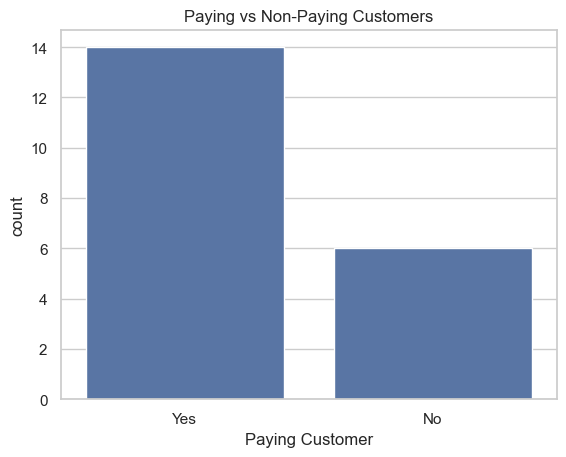

In [19]:
# ---- Step 4: Visualizations ----

sns.set(style="whitegrid")

# 1. Paying Customer Distribution
# plt.figure(figsize=(6, 4))
# sns.countplot(x="Paying Customer", data=df)
# plt.title("Paying vs Non-Paying Customers")
# plt.show()
sns.countplot(data=df, x="Paying Customer")
plt.title("Paying vs Non-Paying Customers")
plt.show()


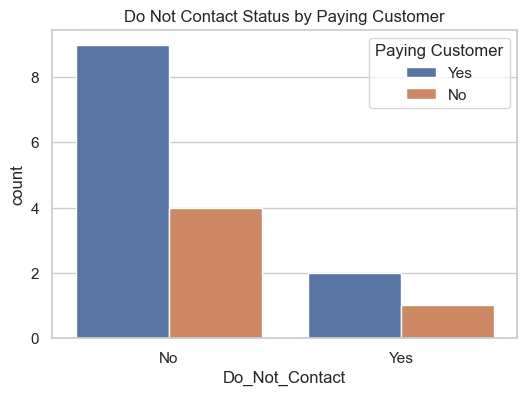

In [8]:
# 2. Do Not Contact by Paying Status
plt.figure(figsize=(6, 4))
sns.countplot(x="Do_Not_Contact", hue="Paying Customer", data=df)
plt.title("Do Not Contact Status by Paying Customer")
plt.show()

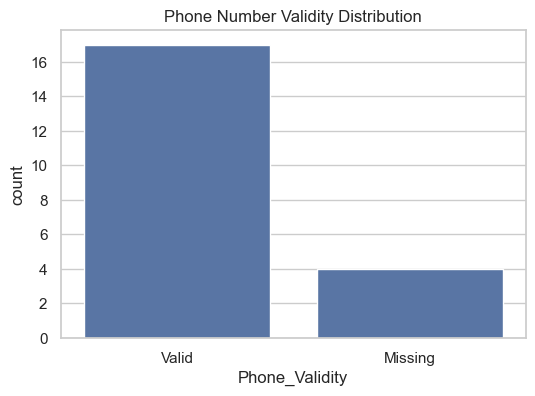

In [9]:
# 3. Phone Number Validity
plt.figure(figsize=(6, 4))
sns.countplot(x="Phone_Validity", data=df)
plt.title("Phone Number Validity Distribution")
plt.show()

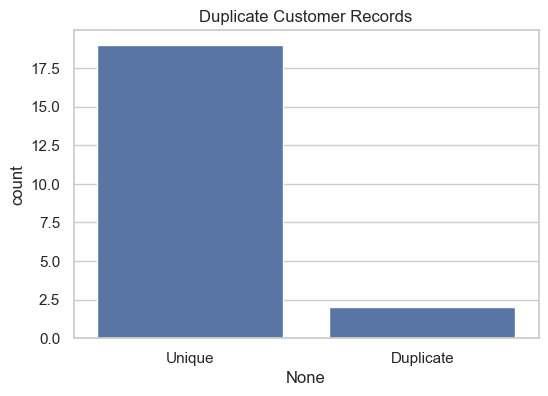

In [10]:
# 4. Duplicates by CustomerID and Phone
duplicates = df.duplicated(subset=["CustomerID", "Phone_Number"], keep=False)
plt.figure(figsize=(6, 4))
sns.countplot(x=duplicates)
plt.xticks([0, 1], ['Unique', 'Duplicate'])
plt.title("Duplicate Customer Records")
plt.show()

<Figure size 600x400 with 0 Axes>

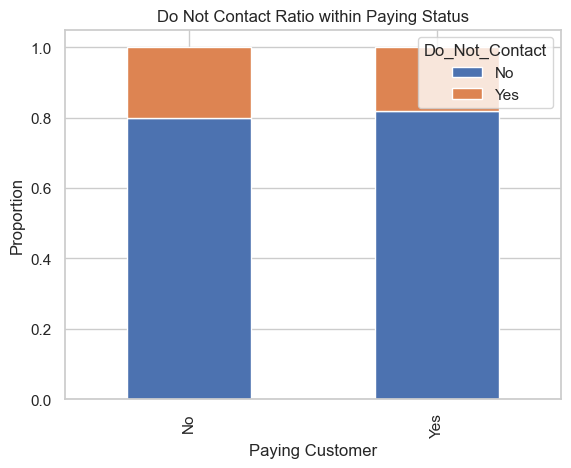

In [11]:
# 5. Cross tab of Paying vs Do_Not_Contact
plt.figure(figsize=(6, 4))
pd.crosstab(df["Paying Customer"], df["Do_Not_Contact"], normalize='index').plot(kind='bar', stacked=True)
plt.title("Do Not Contact Ratio within Paying Status")
plt.ylabel("Proportion")
plt.show()

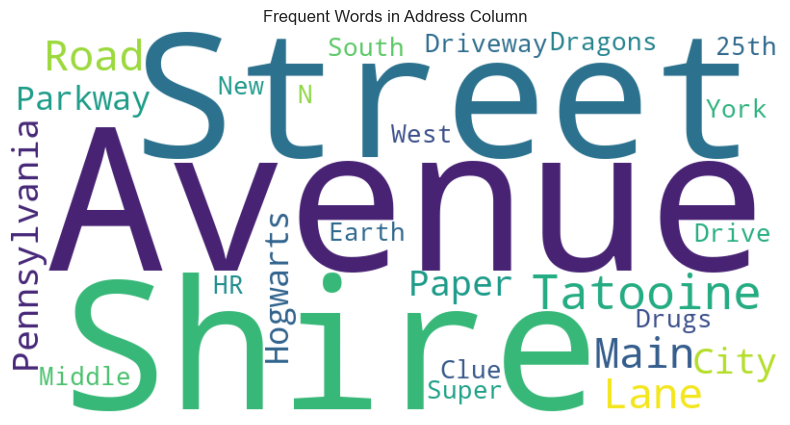

In [12]:
# 6. Word Cloud of Addresses
address_text = " ".join(df["Address"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(address_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Words in Address Column")
plt.show()